In [ ]:
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/Month_Value_1.csv",
                 parse_dates=["Period"],
                 index_col=["Period"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-01-02,1.580759e+07,11636.0,1358.507000,30024676.0
2015-01-03,2.204715e+07,15922.0,1384.697024,30024676.0
2015-01-04,1.881458e+07,15227.0,1235.606705,30024676.0
2015-01-05,1.402148e+07,8620.0,1626.621765,30024676.0


In [ ]:
df.isnull().sum()

Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64

In [ ]:
df = df.dropna()


In [ ]:
df.isnull().sum()

Revenue                                     0
Sales_quantity                              0
Average_cost                                0
The_average_annual_payroll_of_the_region    0
dtype: int64

In [ ]:
# How many samples do we have?
len(df)

64

In [ ]:
# Only want closing price for each day
revenue = pd.DataFrame(df["Revenue"])
revenue.head()

,Revenue
Period,
2015-01-01,1.601007e+07
2015-01-02,1.580759e+07
2015-01-03,2.204715e+07
2015-01-04,1.881458e+07
2015-01-05,1.402148e+07


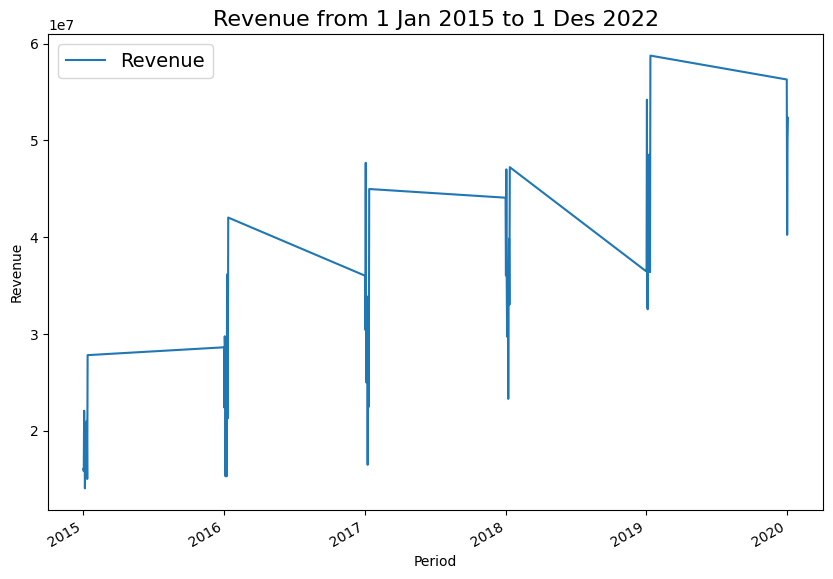

In [ ]:
import matplotlib.pyplot as plt
revenue.plot(figsize=(10, 7))
plt.ylabel("Revenue")
plt.title("Revenue from 1 Jan 2015 to 1 Des 2022", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
 # Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime
import numpy as np

timesteps = []
revenue = []
error = []
with open("/content/Month_Value_1.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
    next(csv_reader) # skip first line (this gets rid of the column titles)
    for line in csv_reader:
        if line[1] != '':
            timesteps.append(datetime.strptime(line[0], "%d.%m.%Y")) # get the dates as dates (not strings), strptime = string parse time
      # print(line[1])
            try:
                revenue.append(float(line[1])) # get the closing price as float
            except:
                error.append(line[1])

# View first 10 of each
timesteps[:10], revenue[:10]


([datetime.datetime(2015, 1, 1, 0, 0),
  datetime.datetime(2015, 2, 1, 0, 0),
  datetime.datetime(2015, 3, 1, 0, 0),
  datetime.datetime(2015, 4, 1, 0, 0),
  datetime.datetime(2015, 5, 1, 0, 0),
  datetime.datetime(2015, 6, 1, 0, 0),
  datetime.datetime(2015, 7, 1, 0, 0),
  datetime.datetime(2015, 8, 1, 0, 0),
  datetime.datetime(2015, 9, 1, 0, 0),
  datetime.datetime(2015, 10, 1, 0, 0)],
 [16010072.1195,
  15807587.449808,
  22047146.023644,
  18814583.29428,
  14021479.611678,
  16783928.522112,
  19161892.194872,
  15204984.296742,
  20603939.9751,
  20992874.780136])

In [ ]:
len(revenue)

64

In [ ]:
len(timesteps)

64

In [ ]:
error

[]

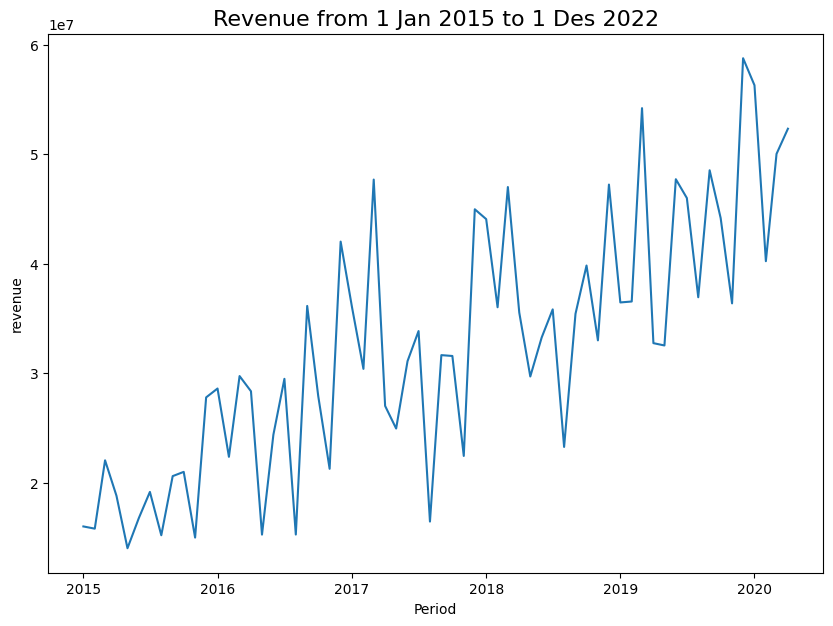

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, revenue)
plt.title("Revenue from 1 Jan 2015 to 1 Des 2022", fontsize=16)
plt.xlabel("Period")
plt.ylabel("revenue");

In [ ]:
timesteps = df.index.to_numpy()
revenue = df["Revenue"].to_numpy()

timesteps[:10], revenue[:10]

(array(['2015-01-01T00:00:00.000000000', '2015-01-02T00:00:00.000000000',
        '2015-01-03T00:00:00.000000000', '2015-01-04T00:00:00.000000000',
        '2015-01-05T00:00:00.000000000', '2015-01-06T00:00:00.000000000',
        '2015-01-07T00:00:00.000000000', '2015-01-08T00:00:00.000000000',
        '2015-01-09T00:00:00.000000000', '2015-01-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([16010072.1195  , 15807587.449808, 22047146.023644, 18814583.29428 ,
        14021479.611678, 16783928.522112, 19161892.194872, 15204984.296742,
        20603939.9751  , 20992874.780136]))

In [ ]:
len(revenue)

64

In [ ]:
len(timesteps)

64

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(revenue)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], revenue[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], revenue[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(51, 13, 51, 13)

X_test: [datetime.datetime(2019, 4, 1, 0, 0), datetime.datetime(2019, 5, 1, 0, 0), datetime.datetime(2019, 6, 1, 0, 0), datetime.datetime(2019, 7, 1, 0, 0), datetime.datetime(2019, 8, 1, 0, 0), datetime.datetime(2019, 9, 1, 0, 0), datetime.datetime(2019, 10, 1, 0, 0), datetime.datetime(2019, 11, 1, 0, 0), datetime.datetime(2019, 12, 1, 0, 0), datetime.datetime(2020, 1, 1, 0, 0), datetime.datetime(2020, 2, 1, 0, 0), datetime.datetime(2020, 3, 1, 0, 0), datetime.datetime(2020, 4, 1, 0, 0)]
y_test: [32743989.6056, 32531657.5397, 47709701.6346, 45992141.57398, 36933665.022, 48526260.1344, 44160416.1824, 36374956.4944, 58756473.6608, 56288300.87, 40225243.264, 50022165.2325, 52320692.9428]
y_train: [16010072.1195, 15807587.449808, 22047146.023644, 18814583.29428, 14021479.611678, 16783928.522112, 19161892.194872, 15204984.296742, 20603939.9751, 20992874.780136, 14993369.65763, 27791807.639848, 28601586.496, 22367074.065584, 29738608.568, 28351007.9388, 15264603.734865, 24385658.077056, 2948

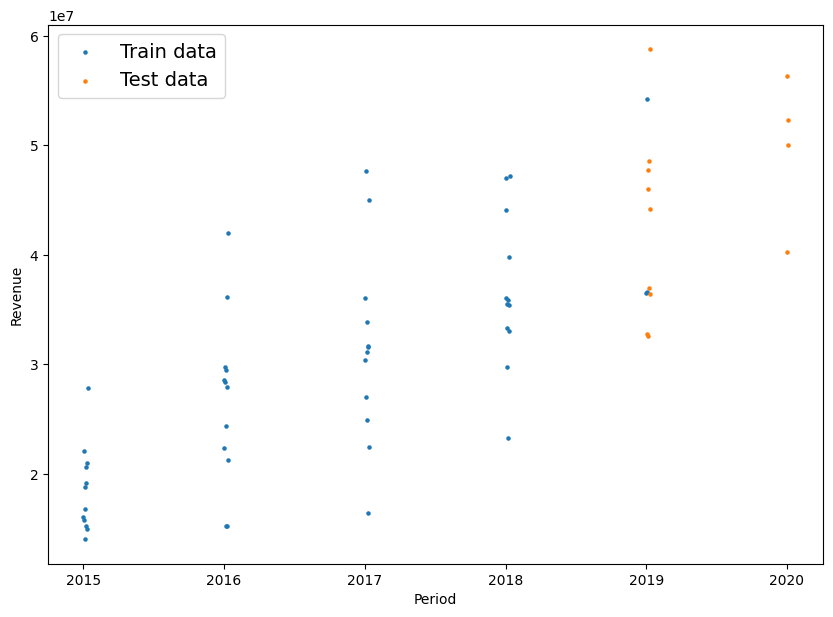

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Period")
plt.ylabel("Revenue")
plt.legend(fontsize=14)
plt.show();

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Revenue")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(True)

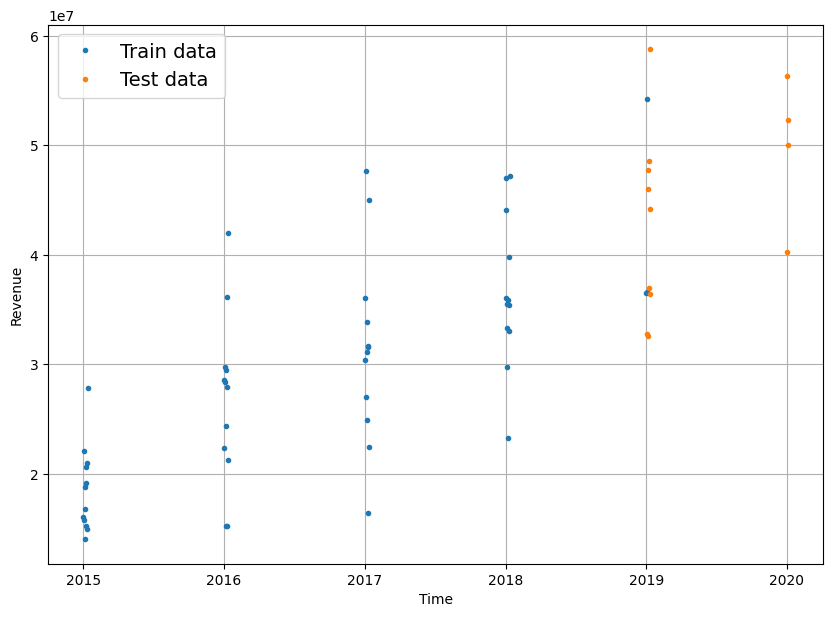

In [ ]:
# Try out function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [ ]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([32743989.6056 , 32531657.5397 , 47709701.6346 , 45992141.57398,
        36933665.022  , 48526260.1344 , 44160416.1824 , 36374956.4944 ,
        58756473.6608 , 56288300.87   ]),
 array([47709701.6346 , 45992141.57398, 36933665.022  , 48526260.1344 ,
        44160416.1824 , 36374956.4944 , 58756473.6608 , 56288300.87   ,
        40225243.264  , 50022165.2325 ]))

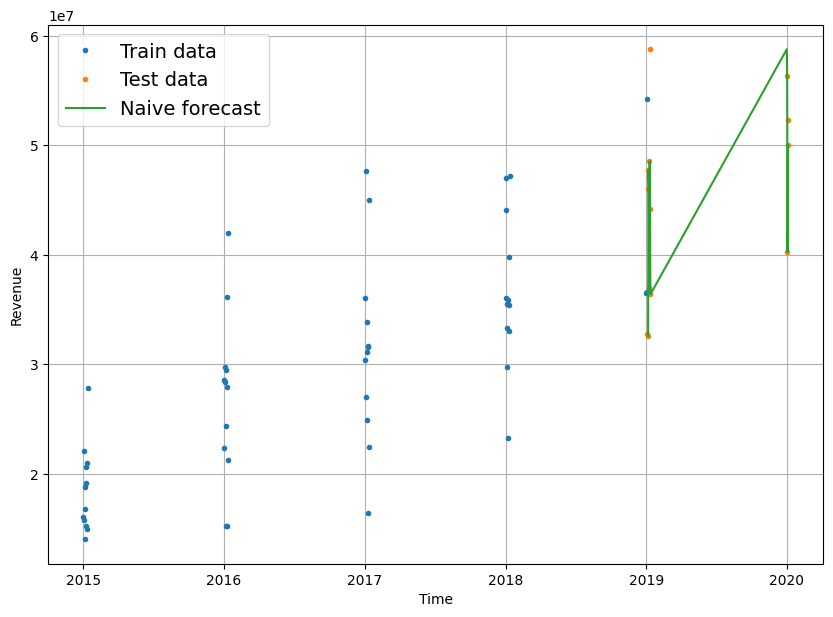

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

    return mae / mae_naive_no_season


In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 8576541.0,
 'mse': 116316260000000.0,
 'rmse': 10785002.0,
 'mape': 18.524485,
 'mase': 0.9185617}

In [ ]:
# Find average
tf.reduce_mean(y_test).numpy()


44814281.85824462

In [ ]:
HORIZON = 1
WINDOW_SIZE = 12

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
    return x[:, :-horizon], x[:, -horizon:]


In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):

  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
    windowed_array = x[window_indexes]

  # 4. Get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

    return windows, labels

In [ ]:
revenue

array([16010072.1195  , 15807587.449808, 22047146.023644, 18814583.29428 ,
       14021479.611678, 16783928.522112, 19161892.194872, 15204984.296742,
       20603939.9751  , 20992874.780136, 14993369.65763 , 27791807.639848,
       28601586.496   , 22367074.065584, 29738608.568   , 28351007.9388  ,
       15264603.734865, 24385658.077056, 29486517.069955, 15270117.2565  ,
       36141027.562   , 27915143.655   , 21272049.3454  , 42014159.88396 ,
       36007380.67    , 30396775.3784  , 47678130.72603 , 27013964.728324,
       24948844.698   , 31101345.543   , 33848822.228544, 16454666.958   ,
       31650092.652   , 31572205.6224  , 22446371.0268  , 44966125.7696  ,
       44067520.858   , 36020287.1553  , 46995990.4125  , 35536487.6848  ,
       29699599.176   , 33261065.3886  , 35826534.9072  , 23268655.2112  ,
       35423489.85    , 39831565.6974  , 32999145.2096  , 47221828.2018  ,
       36459960.091485, 36546498.663015, 54198706.7196  , 32743989.6056  ,
       32531657.5397  , 4

In [ ]:
full_windows, full_labels = make_windows(revenue, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(52, 52)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [16010072.1195   15807587.449808 22047146.023644 18814583.29428
 14021479.611678 16783928.522112 19161892.194872 15204984.296742
 20603939.9751   20992874.780136 14993369.65763  27791807.639848] -> Label: [28601586.496]
Window: [15807587.449808 22047146.023644 18814583.29428  14021479.611678
 16783928.522112 19161892.194872 15204984.296742 20603939.9751
 20992874.780136 14993369.65763  27791807.639848 28601586.496   ] -> Label: [22367074.065584]
Window: [22047146.023644 18814583.29428  14021479.611678 16783928.522112
 19161892.194872 15204984.296742 20603939.9751   20992874.780136
 14993369.65763  27791807.639848 28601586.496    22367074.065584] -> Label: [29738608.568]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [36546498.663015 54198706.7196   32743989.6056   32531657.5397
 47709701.6346   45992141.57398  36933665.022    48526260.1344
 44160416.1824   36374956.4944   58756473.6608   56288300.87    ] -> Label: [40225243.264]
Window: [54198706.7196  32743989.6056  32531657.5397  47709701.6346
 45992141.57398 36933665.022   48526260.1344  44160416.1824
 36374956.4944  58756473.6608  56288300.87    40225243.264  ] -> Label: [50022165.2325]
Window: [32743989.6056  32531657.5397  47709701.6346  45992141.57398
 36933665.022   48526260.1344  44160416.1824  36374956.4944
 58756473.6608  56288300.87    40225243.264   50022165.2325 ] -> Label: [52320692.9428]


In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(41, 11, 41, 11)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[16010072.1195  , 15807587.449808, 22047146.023644,
         18814583.29428 , 14021479.611678, 16783928.522112,
         19161892.194872, 15204984.296742, 20603939.9751  ,
         20992874.780136, 14993369.65763 , 27791807.639848],
        [15807587.449808, 22047146.023644, 18814583.29428 ,
         14021479.611678, 16783928.522112, 19161892.194872,
         15204984.296742, 20603939.9751  , 20992874.780136,
         14993369.65763 , 27791807.639848, 28601586.496   ],
        [22047146.023644, 18814583.29428 , 14021479.611678,
         16783928.522112, 19161892.194872, 15204984.296742,
         20603939.9751  , 20992874.780136, 14993369.65763 ,
         27791807.639848, 28601586.496   , 22367074.065584],
        [18814583.29428 , 14021479.611678, 16783928.522112,
         19161892.194872, 15204984.296742, 20603939.9751  ,
         20992874.780136, 14993369.65763 , 27791807.639848,
         28601586.496   , 22367074.065584, 29738608.568   ],
        [14021479.611678, 16783928.5

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels))

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 30380590.0000 - mae: 30380590.0000 - val_loss: 40555920.0000 - val_mae: 40555920.0000
Epoch 2/100
1/1 [==============================] - 0s 48ms/step - loss: 27462176.0000 - mae: 27462176.0000 - val_loss: 36409496.0000 - val_mae: 36409496.0000
Epoch 3/100
1/1 [==============================] - 0s 44ms/step - loss: 24526552.0000 - mae: 24526552.0000 - val_loss: 32246104.0000 - val_mae: 32246104.0000
Epoch 4/100
1/1 [==============================] - 0s 65ms/step - loss: 21641502.0000 - mae: 21641502.0000 - val_loss: 28082158.0000 - val_mae: 28082158.0000
Epoch 5/100
1/1 [==============================] - 0s 58ms/step - loss: 18852558.0000 - mae: 18852558.0000 - val_loss: 23901220.0000 - val_mae: 23901220.0000
Epoch 6/100
1/1 [==============================] - 0s 43ms/step - loss: 16147027.0000 - mae: 16147027.0000 - val_loss: 19737696.0000 - val_mae: 19737696.0000
Epoch 7/100
1/1 [==============================] - 0s 

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

1/1 [==============================] - 0s 29ms/step - loss: 5175158.0000 - mae: 5175158.0000


[5175158.0, 5175158.0]

In [ ]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

1/1 [==============================] - 0s 95ms/step


(11,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([43417144., 36382480., 36008256., 48415980., 43976296., 40811216.,
        50174056., 46621640., 46682648., 56628808.], dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 5175158.0,
 'mse': 38224496000000.0,
 'rmse': 6182596.0,
 'mape': 10.71376,
 'mase': 0.59125656}

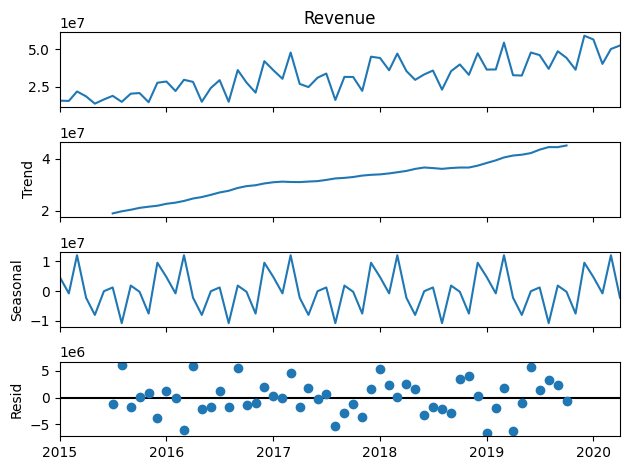

Trend component:
 Period
2015-07-01    1.904412e+07
2015-08-01    1.984208e+07
2015-09-01    2.043587e+07
2015-10-01    2.115370e+07
2015-11-01    2.160284e+07
Name: trend, dtype: float64

Seasonal component:
 Period
2015-01-01    4.715247e+06
2015-02-01   -7.420284e+05
2015-03-01    1.206097e+07
2015-04-01   -2.212709e+06
2015-05-01   -7.976948e+06
Name: seasonal, dtype: float64

Residual component:
 Period
2015-07-01   -1.124827e+06
2015-08-01    6.096203e+06
2015-09-01   -1.704570e+06
2015-10-01    5.340023e+04
2015-11-01    9.150748e+05
Name: resid, dtype: float64


In [ ]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Initialize lists to hold the data
timesteps = []
revenue = []
error = []

# Read the CSV file
with open("/content/Month_Value_1.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")  # Read in the CSV file
    next(csv_reader)  # Skip the first line (column titles)

    # Iterate over each line in the CSV file
    for line in csv_reader:
        if line[1] != '':
            # Convert the date string to a datetime object using the correct format
            timesteps.append(datetime.strptime(line[0], "%d.%m.%Y"))

            # Try to convert the revenue to a float and append to the list
            try:
                revenue.append(float(line[1]))
            except:
                error.append(line[1])

# Check for any conversion errors
if error:
    print("Errors in data conversion:", error)

# Create a pandas DataFrame
df = pd.DataFrame({'Period': timesteps, 'Revenue': revenue})
df.set_index('Period', inplace=True)

# Perform seasonal decomposition with period set to 12 (monthly data)
result = seasonal_decompose(df['Revenue'], model='additive', period=12)

# Plot the decomposition
result.plot()
plt.show()

# Optionally, print the components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

print("Trend component:\n", trend.dropna().head())
print("\nSeasonal component:\n", seasonal.dropna().head())
print("\nResidual component:\n", residual.dropna().head())



In [ ]:
from google.colab import drive
drive.mount('/content/drive')